# Case Study Eight: XGBoost, Random Forest and SVM Predictors 
by Billy Nayden and Quynh Chau March 1, 2021

# 1 INTRODUCTION

The purpose of this case study is to implement XGBoost, Random Forest and SVM classification algorithms and evaluate performance based on log loss where applicable (SVM is the exception).  In addition, a rough scaling of SVM using a range of data sample sizes will be approximated.  

# 2 METHODS


### RANDOM FOREST (RF)

A RandomForest algorithm using the label encoded categorical variables along with our continuous variables as the input. Our baseline log loss was `7.61` and our baseline accuracy was `78%` using the default hyperparameters for RandomForest.

We were not able to produce tuning with the full complement of all features in the data set within a reasonable run time, so we decided to reduce the number of features. We found that 37 features accounted for >99% of all variance in our initial model, so we used those 37 features for parameter tuning. This process was accomplished via `sklearn`'s `SelectFromModel` function.

The hyperparameters we tuned can be described as follows:

>`bootstrap` is a statistical resampling technique involving random sampling. Can be true or false.

>`max_depth` is the maximum number of levels in each decision tree.

>`max_features` is the maximum number of features Random Forest is allowed to try in individual tree.

>`min_samples_leaf` is the minimum number of leaf nodes you can have.

>`min_samples_split` is the minimum number of samples placed in a node before the node is aplit.

>`n_estimators` is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.


### SUPPORT VECTOR MACHINE (SVC)

##### Categorical Variables Preprocessing

There were 19 categorical features in the dataset that was converted to numerical values for data modeling.  Since we had features with a multitude of categories (features with high cardinality), we would expand the feature space dramatically using one hot encoding with binary values 0 or 1.  Alternatively, for each variable, we examined the frequency of values, kept the values that made up rough 87%-90% of occurrences and combined the rest of the values into a single variable.  In some instances, though the value of occurence per single instance was low, when these low frequency occuring values were combined, their total frequency made up the bulk of the occurence.  This process was used in order to minimize the feature space since support vector machine implementations could take a long time given the size of the dataset.  Categorical features were converted to numerics using label encoder.

##### Train/Test Split, Cross Validation and Parameter Tuning

Using a 70:30 Train/test split of the data containing numerical features and the label encoding of categorical features, SVC() was implemented with RandomizedSearchCV with 3-fold cross validation for tuning of paramters C, gamma, and kernel = 'linear'.  C is a regularization parameter that prevents overfitting and has value range {0.1,10,100,1000} where the strength of the regularization is inversely proportional to C.  Gamma has a value range {1,0.1,0.01,0.001,0.0001.0.00001} where the higher the gamma value, the higher the priority is to classify all training examples correctly vs. keeping the decision surface simple and smooth.  Kernel types included 'linear' or 'rbf'.  The combination of C and gamma is important to the performance of the SVC() algorithm and finding the optimal values of C-gamma pairing for each kernel type was done using RandomizedSearchhCV.

SVC() algorithm is time consuming and implementation time took several hours without yielding results.

##### Sample Sampling for SVM

Random samplings of the dataset with sample sizes of 1000,2000,5000 and 10000 were used to test implementation times for  Support Vector Machine classification, SVC(), with 70:30 train/test split and RandommisedSearchCV() with the parameter tuning for a range of 'C'(from 1 to 1000) and 'gamma' (from 0.0001 to 1).  For each sample sizes, the algorithm was implemented with 3-fold cross validation, and 30 iterations.  Performance was evaluated using classification report for F1-score and accuracy as well as confusion matrix. Lastly, verbose = 1 was chosen for progression tracking.


### XGBOOST (XGB)

The XGBoost model using the label encoded categorical variables along with  continuous variables as the input. Our baseline log loss was `0.55` and our baseline accuracy was `76%` using the default hyperparameters for XGBoost.

The hyperparameters we tuned using grid search can be defined as follows:

> `colsample_bytree` is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

> `eta` Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.

> `eval_metric` is the way we will evaluate our best set of parameters, in this case `logloss`

> `max_depth` is the maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

> `min_child_weight` is the minimum sum of instance weight needed in a child. A larger weight will result in a more conservative algorithm.

> `objective` is the type of algorithm

> `subsample` is the subsample ratio of the training instances. A value of 0.5 means half the data would be randomly sampled.

# 3 RESULTS


### SAMPLE SUPPORT VECTOR MACHINE CLASSIFIER

The results for sampling of SVC() implementation using randomizedsearch CV parameter tuning for 30 iterations showed that given the same set of parameters, processing time was faster for smaller sample sizes with non-differentiating performance results.  

|Sample size|Average Time (sec)|Accuracy|
|-----------|------------------|--------|
 10000|0.026|77%|    
 2000|0.093|76%|
 5000|0.563|76%|
10000|3.190|75%|
50000|544|76%|

However, it was noted that the confusion matrices for these samplings only identified true negatives and false positives. Even using a random sample size of 50,000 rows did not make a difference in accuracy.

Results for support vector machine classifier using the same parameters with randomized search CV 3-fold were not available at this time due to it running overnight and is still going after two days.  


### XGBOOST CLASSIFIER

|Hyperparameter|Value|
| --- | --- |
|'colsample_bytree'|1.0|
 |'eta'|0.01|
 |'eval_metric'|'logloss'|
 |'max_depth'|9|
| 'min_child_weight'|5|
 |'objective'|'binary:logistic'|
 |'subsample'|1.0|
 
While the `eta` value of `0.005` was slightly lower log loss, it took twice as long to run as `eta` of `.01` so we opted to sacrifice that small log loss for a faster run time.

Our tuned model reduced log loss to `0.47` while increasing accuracy to `77%`.

### RANDOM FOREST CLASSIFIER

RandomForest grid search and a random search to tune hyperparameters, and got the following as our results:

|Hyperparameter|Value|
| --- | --- |
|'bootstrap'|True|
 |'max_depth'|80|
 |'max_features'|3|
 |'min_samples_leaf'|4|
 |'min_samples_split'|10|
 |'n_estimators'|1000|
 
Our tuned model reduced log loss to `7.35` while increasing accuracy to `79%`.

# 4 Conclusion

XGBoost Classifier is the best algorithm to use for this dataset based on log loss of 0.47 and accuracy of 77%.  Comparatively, Random Forest Classifier yielded a log loss of 7.35 with 79% accuracy.  In addition, XGBoost took about 2 hours to run in contrast to over 5 hours for Random Forest.  

Support vector machine (SVM) was the worst performer as measured by implementation time, due to the sample size.  Based on a random sampling of sample size, accuracies ranged from 75%-77%, but runtime very time consuming.  In addition, the confusion matrix revealed that SVM only yielded false positives and true negatives, therefore, evaluating model performance based on accuracies alone can be misleading.  Moreover, random sampling for the SVM samples may have caused imbalanced subsets of the data, which may impact the results as shown by the confusion matrices.  

# Appendix: Code

## XGBOOST

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C://Users//WilliamNayden//Documents//MSDS//case_8.csv", index_col=0)
target = df['target']
df.drop(['target'],inplace=True, axis=1)

In [3]:
objList = df.select_dtypes(include = "object").columns
print (objList)

#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['v3', 'v22', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71',
       'v74', 'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114321 entries, 3 to 228713
Columns: 131 entries, v1 to v131
dtypes: float64(108), int32(19), int64(4)
memory usage: 106.8 MB
None


In [5]:
train = df
print(train)

              v1        v2  v3        v4         v5        v6        v7  \
ID                                                                        
3       1.335739  8.727474   2  3.921026   7.915266  2.599278  3.176895   
4       1.630686  7.464411   2  4.145098   9.191265  2.436402  2.483921   
5       0.943877  5.310079   2  4.410969   5.326159  3.979592  3.928571   
6       0.797415  8.304757   2  4.225930  11.627438  2.097700  1.987549   
8       1.630686  7.464411   2  4.145098   8.742359  2.436402  2.483921   
...          ...       ...  ..       ...        ...       ...       ...   
228708  1.630686  7.464411   2  4.145098   8.742359  2.436402  2.483921   
228710  1.630686  7.464411   2  4.145098   8.742359  2.436402  2.483921   
228711  1.630686  7.464411   2  4.145098  10.069277  2.436402  2.483921   
228712  1.630686  7.464411   2  4.145098  10.106144  2.436402  2.483921   
228713  1.619763  7.932978   2  4.640085   8.473141  2.351470  2.826766   

              v8        

In [6]:
print("Dataset has {} entries and {} features".format(*train.shape))

Dataset has 114321 entries and 131 features


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.33, random_state=42)

In [7]:
xgtrain = xgb.DMatrix(X_train.values, y_train.values)
xgtest = xgb.DMatrix(X_test.values, y_test.values)

In [8]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [9]:
from sklearn.metrics import log_loss, accuracy_score

In [17]:
import numpy as np
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute Log Loss and Accuracy
log_baseline = log_loss(y_test, baseline_predictions)
acc_baseline = accuracy_score(y_test, np.ones(baseline_predictions.shape))

print("Baseline Accuracy is {:.2f}".format(acc_baseline))
print("Baseline Log Loss is {:.2f}".format(log_baseline))

Baseline Accuracy is 0.76
Baseline Log Loss is 0.55


In [18]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}

In [19]:
params['eval_metric'] = "logloss"

In [20]:
num_boost_round = 999

In [21]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-logloss:0.59585
[1]	Test-logloss:0.54349
[2]	Test-logloss:0.51408
[3]	Test-logloss:0.49622
[4]	Test-logloss:0.48699
[5]	Test-logloss:0.48083
[6]	Test-logloss:0.47772
[7]	Test-logloss:0.47577
[8]	Test-logloss:0.47423
[9]	Test-logloss:0.47283
[10]	Test-logloss:0.47257
[11]	Test-logloss:0.47378
[12]	Test-logloss:0.47440
[13]	Test-logloss:0.47358
[14]	Test-logloss:0.47444
[15]	Test-logloss:0.47440
[16]	Test-logloss:0.47383
[17]	Test-logloss:0.47389
[18]	Test-logloss:0.47399
[19]	Test-logloss:0.47445
[20]	Test-logloss:0.47463


In [22]:
print("Best Log Loss: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best Log Loss: 0.47 with 11 rounds


In [23]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss','error'},
    early_stopping_rounds=10
)
cv_results

,train-logloss-mean,train-logloss-std,train-error-mean,train-error-std,test-logloss-mean,test-logloss-std,test-error-mean,test-error-std
0,0.594222,0.000169,0.219355,0.000534,0.596227,0.000418,0.224218,0.002851
1,0.540254,0.000323,0.217635,0.000961,0.543916,0.000762,0.222469,0.002365
2,0.509214,0.000319,0.217090,0.000899,0.514469,0.001079,0.221777,0.003009
3,0.490312,0.000534,0.216398,0.000668,0.497500,0.001061,0.221385,0.002789
4,0.478276,0.000566,0.215363,0.000992,0.487557,0.001440,0.221529,0.002131
5,0.470668,0.000516,0.214616,0.000748,0.482328,0.001366,0.221673,0.002325
6,0.465326,0.000499,0.213781,0.000831,0.479303,0.001508,0.221712,0.002283
7,0.461288,0.000448,0.212416,0.001194,0.477426,0.001778,0.221359,0.002064


In [24]:
print('Best Accuracy: {}', (1-cv_results['test-error-mean'].min()))
print('Best Log Loss: {}'cv_results['test-logloss-mean'].min())

0.47742579999999996

In [25]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [26]:
# Define initial best params and Log Loss
min_logloss = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss', 'error'},
        early_stopping_rounds=10
    )
    # Update best Log Loss
    mean_logloss = cv_results['test-logloss-mean'].min()
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\Log Loss {} for {} rounds".format(mean_logloss, boost_rounds))
    print("\Accuracy {} for {} rounds".format((1-mean_error), boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, Log Loss: {}, Accuracy: {}".format(best_params[0], best_params[1], min_logloss, (1-mean_error)))

CV with max_depth=9, min_child_weight=5
\Log Loss 0.48336480000000004 for 6 rounds
\Accuracy 0.7757031999999999 for 6 rounds
CV with max_depth=9, min_child_weight=6
\Log Loss 0.4841996 for 6 rounds
\Accuracy 0.7746982 for 6 rounds
CV with max_depth=9, min_child_weight=7
\Log Loss 0.48552100000000004 for 6 rounds
\Accuracy 0.775168 for 6 rounds
CV with max_depth=10, min_child_weight=5
\Log Loss 0.48895039999999995 for 6 rounds
\Accuracy 0.7722826 for 6 rounds
CV with max_depth=10, min_child_weight=6
\Log Loss 0.4901923999999999 for 5 rounds
\Accuracy 0.7731184 for 5 rounds
CV with max_depth=10, min_child_weight=7
\Log Loss 0.48927000000000004 for 5 rounds
\Accuracy 0.7733534 for 5 rounds
CV with max_depth=11, min_child_weight=5
\Log Loss 0.49479239999999997 for 5 rounds
\Accuracy 0.7702854 for 5 rounds
CV with max_depth=11, min_child_weight=6
\Log Loss 0.493811 for 5 rounds
\Accuracy 0.7701938 for 5 rounds
CV with max_depth=11, min_child_weight=7
\Log Loss 0.49371279999999995 for 5 roun

In [27]:
params['max_depth'] = 9
params['min_child_weight'] = 5

In [28]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [29]:
min_logloss = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss', 'error'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLog Loss {} for {} rounds".format(mean_logloss, boost_rounds))
    print("\tAccuracy {} for {} rounds".format((1-mean_error), boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample,colsample)
print("Best params: {}, {}, Log Loss: {}, Accuracy: {}".format(best_params[0], best_params[1], min_logloss, (1-mean_error)))

CV with subsample=1.0, colsample=1.0
	Log Loss 0.48336480000000004 for 6 rounds
	Accuracy 0.7757031999999999 for 6 rounds
CV with subsample=1.0, colsample=0.9
	Log Loss 0.48473760000000005 for 7 rounds
	Accuracy 0.7745544 for 7 rounds
CV with subsample=1.0, colsample=0.8
	Log Loss 0.48653880000000005 for 7 rounds
	Accuracy 0.774228 for 7 rounds
CV with subsample=1.0, colsample=0.7
	Log Loss 0.48524400000000006 for 6 rounds
	Accuracy 0.7760036 for 6 rounds
CV with subsample=0.9, colsample=1.0
	Log Loss 0.486137 for 6 rounds
	Accuracy 0.7745936 for 6 rounds
CV with subsample=0.9, colsample=0.9
	Log Loss 0.48725879999999994 for 6 rounds
	Accuracy 0.7741366000000001 for 6 rounds
CV with subsample=0.9, colsample=0.8
	Log Loss 0.4877432 for 6 rounds
	Accuracy 0.774437 for 6 rounds
CV with subsample=0.9, colsample=0.7
	Log Loss 0.4893510000000001 for 5 rounds
	Accuracy 0.7747499999999999 for 5 rounds
CV with subsample=0.8, colsample=1.0
	Log Loss 0.49988839999999996 for 3 rounds
	Accuracy 0.7

In [30]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [32]:
%time

# This can take some time…
min_logloss = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # We update our parameters
    params['eta'] = eta
    
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['logloss', 'error'],early_stopping_rounds=10)
    
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLog Loss {} for {} rounds\n".format(mean_logloss, boost_rounds))
    print("\tAccuracy {} for {} rounds".format((1-mean_error), boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = eta
print("Best params: {}, Log Loss: {}, Accuracy: {}".format(best_params, min_logloss, (1-mean_error)))

Wall time: 0 ns
CV with eta=0.3
Wall time: 34.7 s
	Log Loss 0.48336480000000004 for 6 rounds

	Accuracy 0.7757031999999999 for 6 rounds
CV with eta=0.2
Wall time: 1min 7s
	Log Loss 0.4802938 for 11 rounds

	Accuracy 0.777009 for 11 rounds
CV with eta=0.1
Wall time: 2min 11s
	Log Loss 0.4761602 for 32 rounds

	Accuracy 0.7786150000000001 for 32 rounds
CV with eta=0.05
Wall time: 2min 27s
	Log Loss 0.4761278000000001 for 51 rounds

	Accuracy 0.7786801999999999 for 51 rounds
CV with eta=0.01
Wall time: 3min 43s
	Log Loss 0.5274683999999998 for 85 rounds

	Accuracy 0.7775574 for 85 rounds
CV with eta=0.005
Wall time: 3min 38s
	Log Loss 0.582802 for 83 rounds

	Accuracy 0.7761342 for 83 rounds
Best params: 0.05, Log Loss: 0.4761278000000001, Accuracy: 0.7761342


In [33]:
#Significantly reduces runtime
params['eta'] = .01

In [34]:
params
{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'logloss',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1.0}

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'logloss',
 'max_depth': 9,
 'min_child_weight': 5,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss','error'},
    early_stopping_rounds=10
)

print("Best Log Loss: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))
print("Best Accuracy: {:.2f}".format(1-cv_results['test-error-mean'].min()))


[0]	Test-logloss:0.68934
[1]	Test-logloss:0.68560
[2]	Test-logloss:0.68194
[3]	Test-logloss:0.67836
[4]	Test-logloss:0.67484
[5]	Test-logloss:0.67139
[6]	Test-logloss:0.66799
[7]	Test-logloss:0.66467
[8]	Test-logloss:0.66141
[9]	Test-logloss:0.65821
[10]	Test-logloss:0.65507
[11]	Test-logloss:0.65200
[12]	Test-logloss:0.64899
[13]	Test-logloss:0.64603
[14]	Test-logloss:0.64313
[15]	Test-logloss:0.64030
[16]	Test-logloss:0.63749
[17]	Test-logloss:0.63475
[18]	Test-logloss:0.63205
[19]	Test-logloss:0.62942
[20]	Test-logloss:0.62681
[21]	Test-logloss:0.62426
[22]	Test-logloss:0.62176
[23]	Test-logloss:0.61930
[24]	Test-logloss:0.61689
[25]	Test-logloss:0.61453
[26]	Test-logloss:0.61219
[27]	Test-logloss:0.60991
[28]	Test-logloss:0.60767
[29]	Test-logloss:0.60545
[30]	Test-logloss:0.60328
[31]	Test-logloss:0.60116
[32]	Test-logloss:0.59905
[33]	Test-logloss:0.59700
[34]	Test-logloss:0.59496
[35]	Test-logloss:0.59300
[36]	Test-logloss:0.59105
[37]	Test-logloss:0.58912
[38]	Test-logloss:0.58

In [60]:
d1 = model.get_score(importance_type='gain')
l1 = list(d1.items())

In [66]:
# List of tuples with variable and importance
feature_importances = list(model.get_score(importance_type='weight').items())

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: v50                  Importance: 8038
Variable: v21                  Importance: 3342
Variable: v22                  Importance: 3336
Variable: v34                  Importance: 3138
Variable: v10                  Importance: 3103
Variable: v14                  Importance: 2767
Variable: v12                  Importance: 2719
Variable: v40                  Importance: 2701
Variable: v66                  Importance: 2432
Variable: v125                 Importance: 2107
Variable: v56                  Importance: 2068
Variable: v114                 Importance: 1818
Variable: v113                 Importance: 1532
Variable: v24                  Importance: 1498
Variable: v47                  Importance: 1456
Variable: v52                  Importance: 1416
Variable: v23                  Importance: 1416
Variable: v6                   Importance: 1386
Variable: v99                  Importance: 1318
Variable: v112                 Importance: 1285
Variable: v88                  Importanc

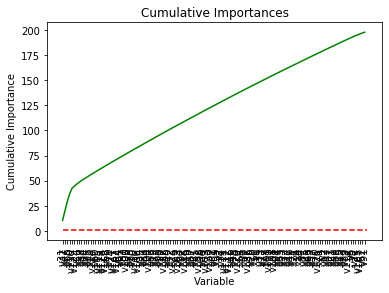

In [65]:
import matplotlib.pyplot as plt

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# list of x locations for plotting
x_values = list(range(len(feature_importances)))

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [75]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(((sum(range(sorted_importances))/cumulative_importances) > 0.95)[0][0] + 1)

SyntaxError: unexpected EOF while parsing (<ipython-input-75-29cddb0ced68>, line 3)

## RANDOM FOREST

In [8]:
# Convert to numpy arrays
import numpy as np

original_features = np.array(train)
original_labels = np.array(target)

# Training and Testing Sets
from sklearn.model_selection import train_test_split

original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, 
                                                                            test_size = 0.33, random_state = 42)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
feature_list = list(train.columns)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model 
rf = RandomForestClassifier()

# Train the model on training data
rf.fit(original_train_features, original_train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(original_test_features)

#Get Log Loss and Accuracy
score = log_loss(original_test_labels, predictions)
acc = accuracy_score(original_test_labels, predictions)
# Print out the mean absolute error (mae)
print('Average log loss:', round(np.mean(score), 2),'.')
print('Average accuracy:', round(np.mean(acc), 2),'.')

Average log loss: 7.61 .
Average accuracy: 0.78 .


In [11]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: v50                  Importance: 0.08
Variable: v12                  Importance: 0.04
Variable: v10                  Importance: 0.03
Variable: v14                  Importance: 0.03
Variable: v21                  Importance: 0.03
Variable: v22                  Importance: 0.03
Variable: v34                  Importance: 0.03
Variable: v40                  Importance: 0.03
Variable: v114                 Importance: 0.03
Variable: v52                  Importance: 0.02
Variable: v56                  Importance: 0.02
Variable: v66                  Importance: 0.02
Variable: v112                 Importance: 0.02
Variable: v125                 Importance: 0.02
Variable: v1                   Importance: 0.01
Variable: v5                   Importance: 0.01
Variable: v6                   Importance: 0.01
Variable: v24                  Importance: 0.01
Variable: v28                  Importance: 0.01
Variable: v31                  Importance: 0.01
Variable: v36                  Importanc

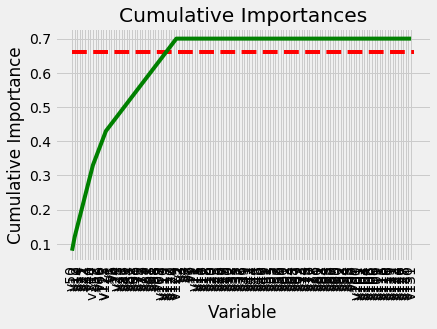

In [13]:
import matplotlib.pyplot as plt

# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.66, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [14]:
# Find number of features for cumulative importance of 66% (max importance)
# Add 1 because Python is zero-indexed
print('Number of features for max importance:', np.where(cumulative_importances > 0.66)[0][0] + 1)

Number of features for max importance: 37


In [11]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
sfm = SelectFromModel(rf, threshold=0.01)

# Train the selector
sfm.fit(original_train_features, original_train_labels)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [12]:
# Print the names of the most important features
feat_labels = list(train.columns)

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

v10
v12
v14
v21
v22
v34
v40
v47
v50
v52
v56
v66
v79
v91
v107
v112
v113
v114
v125


In [13]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [14]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier()

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our  Model
print(accuracy_score(y_test, y_important_pred))
print(log_loss(y_test,y_important_pred))

0.7792503843503155
7.624571249925074


In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_important_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 164.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 323.4min finished


In [24]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [14]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [15]:
# Fit the grid search to the data
grid_search.fit(X_important_train, y_train);

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 40.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 113.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 196.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 272.8min finished


In [16]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [17]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = grid_search.predict(X_important_test)

# View The Accuracy Of Our  Model
print(accuracy_score(y_test, y_important_pred))
print(log_loss(y_test,y_important_pred))

0.7817420346710492
7.53851746548729


## SUPPORT VECTOR MACHINE

In [1]:
# Reading in data file

import os
cwd = os.getcwd()
print(cwd)

C:\Users\Owner


In [ ]:



# Reading in data file

import os
cwd = os.getcwd()
print(cwd)

In [1]:
# Reading in data file

import os
cwd = os.getcwd()
print(cwd)

C:\Users\Owner


In [3]:
df.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
           ...   
v127      float64
v128      float64
v129        int64
v130      float64
v131      float64
Length: 133, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [5]:
df.head(5)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.630686,7.464411,C,4.145098,9.191265,2.436402,2.483921,2.301630,...,6.822439,3.549938,0.598896,AF,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,...,6.822439,3.549938,0.919812,Z,1.672658,3.239542,2.030373,0,1.925763,1.739389


In [6]:
df['target'].unique()

array([1, 0], dtype=int64)

In [7]:
df_cat = df.select_dtypes('object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   v3      114321 non-null  object
 1   v22     114321 non-null  object
 2   v24     114321 non-null  object
 3   v30     114321 non-null  object
 4   v31     114321 non-null  object
 5   v47     114321 non-null  object
 6   v52     114321 non-null  object
 7   v56     114321 non-null  object
 8   v66     114321 non-null  object
 9   v71     114321 non-null  object
 10  v74     114321 non-null  object
 11  v75     114321 non-null  object
 12  v79     114321 non-null  object
 13  v91     114321 non-null  object
 14  v107    114321 non-null  object
 15  v110    114321 non-null  object
 16  v112    114321 non-null  object
 17  v113    114321 non-null  object
 18  v125    114321 non-null  object
dtypes: object(19)
memory usage: 16.6+ MB


In [ ]:
Variable 'v3' Combination
df_cat['v3'].value_counts()
C    114041
A       227
B        53
Name: v3, dtype: int64
df_cat['v3'] = df_cat['v3'].replace(['C','A','B'],['C','AB','AB'])
df_cat['v3'].value_counts()
C     114041
AB       280
Name: v3, dtype: int64


# Variable 'v22' Combination

In [10]:
df_cat['v22'].value_counts()

AGDF    2886
YGJ     2119
QKI      668
PWR      649
HZE      423
        ... 
ACKY       1
PPF        1
MMC        1
WXH        1
ZDI        1
Name: v22, Length: 18210, dtype: int64

In [11]:
v22_dict = ['AGDF','YGJ','QKI','PWR','HZE']
df_cat.loc[~df_cat["v22"].isin(v22_dict), "v22"] = "N!!"
df_cat['v22'].value_counts()

N!!     107576
AGDF      2886
YGJ       2119
QKI        668
PWR        649
HZE        423
Name: v22, dtype: int64

In [ ]:
# Variable 'v22' Combination

df_cat['v22'].value_counts()

v22_dict = ['AGDF','YGJ','QKI','PWR','HZE']
df_cat.loc[~df_cat["v22"].isin(v22_dict), "v22"] = "N!!"
df_cat['v22'].value_counts()

# Variable 'v24' Combination

In [12]:
df_cat['v24'].value_counts()

E    55177
D    26333
C    20872
B     8150
A     3789
Name: v24, dtype: int64

In [13]:
df_cat['v24'] = df_cat['v24'].replace(['E','D','C','B','A'],['E','D','C','BA','BA'])
df_cat['v24'].value_counts()

E     55177
D     26333
C     20872
BA    11939
Name: v24, dtype: int64

# Variable 'v30' Combination

In [14]:
df_cat['v30'].value_counts()

C    92288
G     8728
D     5225
E     2973
F     2589
A     2313
B      205
Name: v30, dtype: int64

In [15]:
df_cat['v30'] = df_cat['v30'].replace(['C','G','D','E','F','A','B'],['C','G','D','EFAB','EFAB','EFAB','EFAB'])
df_cat['v30'].value_counts()

C       92288
G        8728
EFAB     8080
D        5225
Name: v30, dtype: int64

# Variable 'v31' Combination

In [16]:
df_cat['v31'].value_counts()

A    91804
B    18947
C     3570
Name: v31, dtype: int64

In [17]:
df_cat['v31'] = df_cat['v31'].replace(['A','B','C'],['A','BC','BC'])
df_cat['v31'].value_counts()

A     91804
BC    22517
Name: v31, dtype: int64

# Variable 'v31' Combination

In [16]:
df_cat['v31'].value_counts()

A    91804
B    18947
C     3570
Name: v31, dtype: int64

In [17]:
df_cat['v31'] = df_cat['v31'].replace(['A','B','C'],['A','BC','BC'])
df_cat['v31'].value_counts()

A     91804
BC    22517
Name: v31, dtype: int64

In [ ]:
# Variable 'v31' Combination

df_cat['v31'].value_counts()

df_cat['v31'] = df_cat['v31'].replace(['A','B','C'],['A','BC','BC'])
df_cat['v31'].value_counts()# Variable 'v52' Combination

df_cat['v52'].value_counts()

df_cat['v52'] = df_cat['v52'].replace(['J','I','F','C','D','L','G','B','E','K','A','H'],['J','I','F','C','D','L','G','B','E',
                                                                                        'KAH','KAH','KAH'])
df_cat['v52'].value_counts()

# Variable 'v47' Combination

In [18]:
df_cat['v47'].value_counts()

C    55425
I    39071
E     5301
F     4322
G     3946
D     3157
J     3010
B       50
A       38
H        1
Name: v47, dtype: int64

In [19]:
df_cat['v47'] = df_cat['v47'].replace(['C','I','E','F','G','D','J','B','A','H'],
                                      ['C','I','E','F','G_H','G_H','G_H','G_H','G_H','G_H'])
df_cat['v47'].value_counts()

C      55425
I      39071
G_H    10202
E       5301
F       4322
Name: v47, dtype: int64

# Variable 'v52' Combination

In [20]:
df_cat['v52'].value_counts()

J    11106
I    10260
F     9806
C     9681
D     9607
L     9578
G     9419
B     9385
E     9282
K     8949
A     8925
H     8323
Name: v52, dtype: int64

In [21]:
df_cat['v52'] = df_cat['v52'].replace(['J','I','F','C','D','L','G','B','E','K','A','H'],['J','I','F','C','D','L','G','B','E',
                                                                                        'KAH','KAH','KAH'])
df_cat['v52'].value_counts()

KAH    26197
J      11106
I      10260
F       9806
C       9681
D       9607
L       9578
G       9419
B       9385
E       9282
Name: v52, dtype: int64

# Variable 'v56' Combination

In [22]:
df_cat['v56'].value_counts()

BW    18233
DI    10256
AS     8832
BZ     7174
AW     6369
      ...  
CZ        1
D         1
AX        1
DB        1
CE        1
Name: v56, Length: 122, dtype: int64

In [23]:
v56_dict = ['BW','DI','AS','BZ','AW']
df_cat.loc[~df_cat["v56"].isin(v56_dict), "v56"] = "C!!"
df_cat['v56'].value_counts()

C!!    63457
BW     18233
DI     10256
AS      8832
BZ      7174
AW      6369
Name: v56, dtype: int64

In [ ]:
# Variable 'v56' Combination

df_cat['v56'].value_counts()

v56_dict = ['BW','DI','AS','BZ','AW']
df_cat.loc[~df_cat["v56"].isin(v56_dict), "v56"] = "C!!"
df_cat['v56'].value_counts()

# Variable 'v66' Combination

In [24]:
df_cat['v66'].value_counts()

A    70353
C    25704
B    18264
Name: v66, dtype: int64

# Variable 'v71' Combination

In [25]:
df_cat['v71'].value_counts()

F    75094
B    30255
C     8947
I       16
G        5
A        1
L        1
K        1
D        1
Name: v71, dtype: int64

In [26]:
df_cat['v71'] = df_cat['v71'].replace(['F','B','C','I','G','D','L','K','A'],['F','B','C','IGDLKA','IGDLKA','IGDLKA',
                                                                            'IGDLKA','IGDLKA','IGDLKA'])
                                                                           
df_cat['v71'].value_counts()

F         75094
B         30255
C          8947
IGDLKA       25
Name: v71, dtype: int64

# Variable 'v74' Combination

In [27]:
df_cat['v74'].value_counts()

B    113560
C       716
A        45
Name: v74, dtype: int64

In [28]:
df_cat['v74'] = df_cat['v74'].replace(['B','C','A'],['B','CA','CA'])
df_cat['v74'].value_counts()

B     113560
CA       761
Name: v74, dtype: int64

# Variable 'v75' Combination

In [29]:
df_cat['v75'].value_counts()

D    75087
B    39192
C       24
A       18
Name: v75, dtype: int64

In [30]:
df_cat['v75'] = df_cat['v75'].replace(['D','B','C','A'],['D','B','CA','CA'])
df_cat['v75'].value_counts()

D     75087
B     39192
CA       42
Name: v75, dtype: int64

# Variable 'v79' Combination

In [31]:
df_cat['v79'].value_counts()

C    34561
B    25801
E    25257
D     5302
I     4561
K     4308
M     3946
O     3331
P     2217
H     2004
Q     1006
J      933
F      571
A      417
R       50
N       49
G        6
L        1
Name: v79, dtype: int64

In [32]:
df_cat['v79'] = df_cat['v79'].replace(['C','B','E','D','I','K','M','O','P','H','Q','J','F','A','R','N','G','L'],
                                      ['C','B','E','D','I','K','M','O_L','O_L','O_L','O_L','O_L','O_L','O_L','O_L','O_L',
                                      'O_L','O_L'])
                                                                           
df_cat['v79'].value_counts()

C      34561
B      25801
E      25257
O_L    10585
D       5302
I       4561
K       4308
M       3946
Name: v79, dtype: int64

# Variable 'v91' combination

In [33]:
df_cat['v91'].value_counts()

A    27082
G    24545
C    23157
B    22683
F    13418
E     3206
D      230
Name: v91, dtype: int64

In [34]:
df_cat['v91'] = df_cat['v91'].replace(['A','G','C','B','F','E','D'],['A','G','C','B','F','ED','ED'])
df_cat['v91'].value_counts()

A     27082
G     24545
C     23157
B     22683
F     13418
ED     3436
Name: v91, dtype: int64

# Variable 'v107' Combinations

In [35]:
df_cat['v107'].value_counts()

E    27082
C    24545
D    23157
B    22683
A    13418
F     3206
G      230
Name: v107, dtype: int64

In [36]:
df_cat['v107'] = df_cat['v107'].replace(['E','C','D','B','A','F','G'],['E','C','D','B','A','FG','FG'])
df_cat['v107'].value_counts()

E     27082
C     24545
D     23157
B     22683
A     13418
FG     3436
Name: v107, dtype: int64

# Variable 'v110' Combinations

In [37]:
df_cat['v110'].value_counts()

A    55688
B    55426
C     3207
Name: v110, dtype: int64

# Variable 'v112' Combination

In [38]:
df_cat['v112'].value_counts()

F    22053
I    10224
A     9545
N     9086
D     7327
H     5651
U     4803
E     4748
P     4675
L     4479
R     4170
T     3980
J     3967
O     3661
K     3252
B     2688
Q     2346
C     2055
V     1883
G     1702
M     1193
S      833
Name: v112, dtype: int64

In [39]:
v112_dict = ['F','I','A','N','D','H','U','E','P','L','R','T','J','O','K']
df_cat.loc[~df_cat["v112"].isin(v112_dict), "v112"] = "112!!"
df_cat['v112'].value_counts()

F        22053
112!!    12700
I        10224
A         9545
N         9086
D         7327
H         5651
U         4803
E         4748
P         4675
L         4479
R         4170
T         3980
J         3967
O         3661
K         3252
Name: v112, dtype: int64

# Variable 'v113' Combination

In [40]:
df_cat['v113'].value_counts()

G     71556
M      7374
AC     5956
AF     3568
I      2605
P      1975
AG     1712
V      1673
X      1635
T      1608
W      1497
B      1358
Y      1282
AB     1273
N      1186
AJ      872
AH      797
C       707
AE      680
S       614
U       612
Q       594
L       477
Z       453
A       334
E       324
J       322
AI      313
AD      265
F       233
R       181
D       142
O       100
H        41
AK        1
AA        1
Name: v113, dtype: int64

In [41]:
v113_dict = ['G','M','AC','AF','I','P','AG','V','X','T','W','B','Y','AB','N','AJ','AH','C']
df_cat.loc[~df_cat["v113"].isin(v113_dict), "v113"] = "113!!"
df_cat['v113'].value_counts()

G        71556
M         7374
AC        5956
113!!     5687
AF        3568
I         2605
P         1975
AG        1712
V         1673
X         1635
T         1608
W         1497
B         1358
Y         1282
AB        1273
N         1186
AJ         872
AH         797
C          707
Name: v113, dtype: int64

# Variable 'v125' Combinations

In [42]:
df_cat['v125'].value_counts()

BM    5836
AK    5337
BJ    4465
CG    3826
AP    3410
      ... 
AB     189
AJ      82
BB      68
AX      13
BZ       3
Name: v125, Length: 90, dtype: int64

In [43]:
v125_dict = ['BM','AK','BJ','CG','AP']
df_cat.loc[~df_cat["v125"].isin(v125_dict), "v125"] = "125!!"
df_cat['v125'].value_counts()

125!!    91447
BM        5836
AK        5337
BJ        4465
CG        3826
AP        3410
Name: v125, dtype: int64

# Label Encoding the Entire DF_Cat Data Set

In [44]:
# Import labelEncoder from sklearn
# Create one hot encoder object by default
# The entire df_cat dataframe is one hot encoded

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat1 = df_cat.apply(le.fit_transform)

In [45]:
df_cat1.head(5)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,1,2,1,0,0,0,5,5,2,2,0,2,3,0,4,1,11,9,0
1,1,2,1,0,0,1,5,4,0,2,0,2,2,1,1,0,15,9,0
2,1,2,3,0,0,0,4,0,0,0,0,0,3,5,2,1,0,9,0
3,1,2,2,0,1,0,8,2,0,2,0,2,0,1,1,1,7,9,0
4,1,2,3,0,0,4,8,2,2,2,0,2,1,5,2,0,14,9,0


# Creating dataframe with  numerical features

In [46]:
df_num =df.select_dtypes(exclude='object')
df_num.info()
df_num.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 114 entries, ID to v131
dtypes: float64(108), int64(6)
memory usage: 99.4 MB


,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,2.737596,6.822439,3.549938,0.598896,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,2.737596,6.822439,3.549938,0.919812,1.672658,3.239542,2.030373,0,1.925763,1.739389


# Append df_num and df_cat1 (label encoded)

In [47]:
horizontal_stack = pd.concat([df_num, df_cat1], axis=1)
horizontal_stack

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,2,0,2,3,0,4,1,11,9,0
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,2,0,2,2,1,1,0,15,9,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0,0,0,3,5,2,1,0,9,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,2,0,2,0,1,1,1,7,9,0
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,2,0,2,1,5,2,0,14,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,228708,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,0,0,0,1,0,4,0,15,9,0
114317,228710,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,2,0,2,0,5,2,1,7,9,0
114318,228711,1,1.630686,7.464411,4.145098,10.069277,2.436402,2.483921,0.323324,9.031859,...,0,0,0,0,5,2,1,13,9,0
114319,228712,1,1.630686,7.464411,4.145098,10.106144,2.436402,2.483921,0.309226,9.031859,...,2,0,2,3,0,4,1,1,9,0


In [48]:
horizontal_stack.to_csv('raw_data.csv', index=False)

In [ ]:
# Testing Duration of Time for SVM using samples of n= {1000,2000,5000,10,000 and 50,000}

In [49]:
df_H1000 = horizontal_stack.sample(n=1000, random_state = 101)

In [50]:
# Support Vector Machine with Hyperparameter Tuning 

# Separate target and feature variables into separate data sets

Y1000 = df_H1000['target']
X1000 = df_H1000.drop(['target'],axis = 1)


In [51]:
X1000

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
16140,32411,0.916977,10.959701,3.834475,7.812437,2.589840,3.060718,6.088222,7.142858,1.838075,...,2,0,2,1,0,4,0,13,2,0
12090,24225,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,0.787745,...,2,0,2,6,4,0,0,4,11,2
8130,16215,1.793939,7.083087,4.919902,7.531944,2.133333,3.006061,0.035744,7.719298,1.050329,...,2,0,2,1,1,1,0,3,11,0
88034,175818,1.992630,3.495210,3.570470,8.866604,3.174603,2.692744,17.297778,7.404845,0.722101,...,2,0,2,3,2,3,1,0,9,0
100381,200583,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.312910,...,0,0,0,1,0,4,0,14,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82771,165226,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.575492,...,2,0,2,1,0,4,0,10,15,1
95427,190712,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.312910,...,2,0,2,1,2,3,0,4,16,0
51505,102906,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,1.050328,...,2,0,2,1,2,3,0,4,15,0
4438,8835,1.963733,3.699428,4.192277,8.924797,3.591331,2.538699,1.962591,11.985294,1.028447,...,2,0,2,3,5,2,1,10,9,1


In [52]:
Y1000.value_counts()

1    778
0    222
Name: target, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split( 
                        X1000, Y1000, test_size = 0.30, random_state = 101) 

In [54]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

rand_list = {'C': stats.uniform(1,1000), 'gamma':stats.uniform(0.0001,1)}
rand_search = RandomizedSearchCV(SVC(),param_distributions = rand_list, n_iter = 30, n_jobs=4, cv = 3, refit = True, random_state = 101, verbose = 1)
rand_search.fit(X_train,y_train)

print ('Results for SVM with Randomized Search 3-CV, Rows = 1000')
print(rand_search.cv_results_)

print('Best SVC() Parameters')
print(rand_search.best_params_)

rand_predictions=rand_search.predict(X_test)
print('Confusion Matrix - Rows = 1,000')
CFM = confusion_matrix(y_test,rand_predictions,labels =[0,1])
print(CFM)

print('Classification Report')
print(classification_report(y_test,rand_predictions,labels = [0,1]))





Fitting 3 folds for each of 30 candidates, totalling 90 fits
Results for SVM with Randomized Search 3-CV, Rows = 1000
{'mean_fit_time': array([0.0510842 , 0.0308938 , 0.02602506, 0.02601695, 0.02084732,
       0.03122338, 0.02603594, 0.02603579, 0.02603634, 0.02082841,
       0.02603428, 0.01562158, 0.02603428, 0.02603467, 0.0260551 ,
       0.02603587, 0.02639135, 0.03159833, 0.02083   , 0.02603555,
       0.02603547, 0.02082809, 0.03125175, 0.03645849, 0.02082801,
       0.02084668, 0.03121352, 0.02082809, 0.02082872, 0.02603539]), 'std_fit_time': array([7.36378498e-03, 1.23659972e-02, 7.37742322e-03, 1.47409446e-02,
       7.37064982e-03, 1.35993831e-05, 7.36350400e-03, 7.36389737e-03,
       7.36412216e-03, 7.36429077e-03, 7.36266106e-03, 2.97360213e-07,
       7.36417837e-03, 7.36445933e-03, 7.37792558e-03, 7.36445937e-03,
       1.52318149e-02, 1.31937830e-02, 7.36266132e-03, 7.36406610e-03,
       7.36502141e-03, 7.36417836e-03, 1.27663266e-02, 1.47342062e-02,
       7.36339161e

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
df_H2000 = horizontal_stack.sample(n=2000, random_state = 101)

In [56]:
# Support Vector Machine with Hyperparameter Tuning 

# Separate target and feature variables into separate data sets

Y2000 = df_H2000['target']
X2000 = df_H2000.drop(['target'],axis = 1)


In [57]:
Y2000.value_counts()

1    1518
0     482
Name: target, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split 
  
X_train2, X_test2, y_train2, y_test2 = train_test_split( 
                        X2000, Y2000, test_size = 0.30, random_state = 101) 

In [59]:

rand_list2 = {'C': stats.uniform(1,1000), 'gamma':stats.uniform(0.0001,1)}
rand_search2 = RandomizedSearchCV(SVC(),param_distributions = rand_list2, n_iter = 30, n_jobs=4, cv = 3, refit = True, random_state = 101, verbose = 1)
rand_search2.fit(X_train2,y_train2)

print ('Results for SVM with Randomized Search 3-CV, Rows = 2000')
print(rand_search2.cv_results_)

print('Best SVC() Parameters')
print(rand_search2.best_params_)

rand_predictions2=rand_search2.predict(X_test2)
print('Confusion Matrix - Rows = 2,000')
CFM2 = confusion_matrix(y_test2,rand_predictions2,labels =[0,1])
print(CFM2)

print('Classification Report')
print(classification_report(y_test2,rand_predictions2,labels = [0,1]))





Fitting 3 folds for each of 30 candidates, totalling 90 fits
Results for SVM with Randomized Search 3-CV, Rows = 2000
{'mean_fit_time': array([0.12345982, 0.08480493, 0.08579628, 0.09868519, 0.10454488,
       0.10016505, 0.10685698, 0.11526879, 0.08651781, 0.09263515,
       0.08991146, 0.07884518, 0.09416429, 0.08973598, 0.09416119,
       0.10414195, 0.0937283 , 0.08330448, 0.09371853, 0.08366855,
       0.08331394, 0.08331386, 0.08890335, 0.08331386, 0.09894379,
       0.09373657, 0.08851043, 0.1049823 , 0.08485428, 0.09963473]), 'std_fit_time': array([5.80895142e-03, 7.51488586e-03, 6.86943859e-03, 8.28696955e-03,
       6.94907944e-03, 5.94231041e-03, 2.73828921e-02, 3.14723179e-02,
       1.00107790e-02, 1.21030811e-02, 6.85486168e-03, 1.04411793e-03,
       6.37929244e-04, 7.36687262e-03, 1.22285094e-02, 1.47277947e-02,
       2.38474204e-05, 7.35052277e-03, 1.40012144e-05, 7.12743132e-03,
       7.36490890e-03, 7.36378499e-03, 7.64906661e-03, 7.36530227e-03,
       1.94953183e

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
df_H5000 = horizontal_stack.sample(n=5000, random_state = 101)

In [61]:
# Support Vector Machine with Hyperparameter Tuning 

# Separate target and feature variables into separate data sets

Y5000 = df_H5000['target']
X5000 = df_H5000.drop(['target'],axis = 1)


In [62]:
Y5000.value_counts()

1    3798
0    1202
Name: target, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split 
  
X_train5, X_test5, y_train5, y_test5 = train_test_split( 
                        X5000, Y5000, test_size = 0.30, random_state = 101) 

In [64]:

rand_list5 = {'C': stats.uniform(1,1000), 'gamma':stats.uniform(0.0001,1)}
rand_search5 = RandomizedSearchCV(SVC(),param_distributions = rand_list5, n_iter = 30, n_jobs=4, cv = 3, refit = True, random_state = 101, verbose = 1)
rand_search5.fit(X_train5,y_train5)

print ('Results for SVM with Randomized Search 3-CV, Rows = 5000')
print(rand_search5.cv_results_)

print('Best SVC() Parameters')
print(rand_search5.best_params_)

rand_predictions5=rand_search5.predict(X_test5)
print('Confusion Matrix - Rows = 5,000')
CFM5 = confusion_matrix(y_test5,rand_predictions5,labels =[0,1])
print(CFM5)

print('Classification Report')
print(classification_report(y_test5,rand_predictions5,labels = [0,1]))





Fitting 3 folds for each of 30 candidates, totalling 90 fits
Results for SVM with Randomized Search 3-CV, Rows = 5000
{'mean_fit_time': array([0.64541753, 0.61695711, 0.60115623, 0.65089671, 0.6250368 ,
       0.57491207, 0.57583777, 0.57583316, 0.54955721, 0.53788471,
       0.54789559, 0.55840532, 0.52868573, 0.59578164, 0.57990829,
       0.54047251, 0.56389976, 0.56386757, 0.52997557, 0.54892047,
       0.52438505, 0.52950406, 0.53278677, 0.53740525, 0.53224683,
       0.53708728, 0.55265872, 0.55068723, 0.54975589, 0.53188602]), 'std_fit_time': array([0.02189631, 0.05021263, 0.08327365, 0.03681196, 0.03383056,
       0.03758515, 0.00661717, 0.02653858, 0.02151495, 0.01508248,
       0.01280763, 0.00736401, 0.00725508, 0.07761367, 0.06784652,
       0.01496659, 0.03357045, 0.0260543 , 0.01016148, 0.01411961,
       0.01348992, 0.01303788, 0.02173382, 0.00736373, 0.0126821 ,
       0.03157872, 0.03859009, 0.01324109, 0.01706529, 0.02500043]), 'mean_score_time': array([0.5006307 , 0.

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
df_H10000 = horizontal_stack.sample(n=10000, random_state = 101)

In [66]:
# Support Vector Machine with Hyperparameter Tuning 

# Separate target and feature variables into separate data sets

Y10000 = df_H10000['target']
X10000 = df_H10000.drop(['target'],axis = 1)


In [67]:
Y10000.value_counts()

1    7593
0    2407
Name: target, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split 
  
X_train10, X_test10, y_train10, y_test10 = train_test_split( 
                        X10000, Y10000, test_size = 0.30, random_state = 101) 

In [70]:

rand_list10 = {'C': stats.uniform(1,1000), 'gamma':stats.uniform(0.0001,1)}
rand_search10 = RandomizedSearchCV(SVC(),param_distributions = rand_list10, n_iter = 30, n_jobs=4, cv = 3, refit = True, random_state = 101, verbose = 1)
rand_search10.fit(X_train10,y_train10)

print ('Results for SVM with Randomized Search 3-CV, Rows = 10000')
print(rand_search10.cv_results_)

print('Best SVC() Parameters')
print(rand_search10.best_params_)

rand_predictions10=rand_search10.predict(X_test10)
print('Confusion Matrix - Rows = 10,000')
CFM10 = confusion_matrix(y_test10,rand_predictions10,labels =[0,1])
print(CFM10)

print('Classification Report')
print(classification_report(y_test10,rand_predictions10,labels = [0,1]))





Fitting 3 folds for each of 30 candidates, totalling 90 fits
Results for SVM with Randomized Search 3-CV, Rows = 10000
{'mean_fit_time': array([3.52038177, 3.57033547, 3.57059924, 3.47048291, 3.48401658,
       3.59704002, 3.59278584, 3.34103346, 3.41686932, 3.45519551,
       3.2884353 , 3.34823998, 3.24093596, 3.42217811, 3.33653108,
       3.24890057, 3.11534039, 3.08588163, 3.06858134, 3.12029966,
       2.72695581, 2.75830253, 2.98155165, 2.84462667, 2.74132125,
       2.74711593, 2.94504213, 2.86117824, 2.91014187, 2.89900788]), 'std_fit_time': array([0.01845849, 0.08423283, 0.07016793, 0.03508372, 0.02692799,
       0.11420797, 0.09727228, 0.02702875, 0.05676155, 0.01591014,
       0.0128724 , 0.03364099, 0.06770051, 0.13664532, 0.15242033,
       0.03369059, 0.10971061, 0.17319806, 0.23455939, 0.04062039,
       0.29726834, 0.16732159, 0.12059417, 0.17635016, 0.1782544 ,
       0.19473456, 0.05303346, 0.16310146, 0.07708606, 0.16260545]), 'mean_score_time': array([1.91182836, 1

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
df_H50000 = horizontal_stack.sample(n=50000, random_state = 101)

In [91]:
# Support Vector Machine with Hyperparameter Tuning 

# Separate target and feature variables into separate data sets

Y50000 = df_H50000['target']
X50000 = df_H50000.drop(['target'],axis = 1)


In [92]:
Y50000.value_counts()

1    38138
0    11862
Name: target, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split 
  
X_train50, X_test50, y_train50, y_test50 = train_test_split( 
                        X50000, Y50000, test_size = 0.30, random_state = 101) 

In [94]:

rand_list50 = {'C': stats.uniform(1,1000), 'gamma':stats.uniform(0.0001,1)}
rand_search50 = RandomizedSearchCV(SVC(),param_distributions = rand_list50, n_iter = 30, n_jobs=4, cv = 3, refit = True, random_state = 101, verbose = 1)
rand_search50.fit(X_train50,y_train50)

print ('Results for SVM with Randomized Search 3-CV, Rows = 50000')
print(rand_search50.cv_results_)

print('Best SVC() Parameters')
print(rand_search50.best_params_)

rand_predictions50=rand_search50.predict(X_test50)
print('Confusion Matrix - Rows = 50,000')
CFM50 = confusion_matrix(y_test50,rand_predictions50,labels =[0,1])
print(CFM50)

print('Classification Report')
print(classification_report(y_test50,rand_predictions50,labels = [0,1]))





Fitting 3 folds for each of 30 candidates, totalling 90 fits
Results for SVM with Randomized Search 3-CV, Rows = 50000
{'mean_fit_time': array([536.84340151, 537.75959651, 538.7595555 , 535.94890054,
       503.00869862, 536.77806966, 474.34260909, 464.64144913,
       530.48935795, 526.6572543 , 500.02553829, 523.95442629,
       542.87410752, 552.64114761, 498.39000901, 528.53167049,
       530.76054255, 518.92245928, 555.26290147, 562.55395524,
       518.96970606, 564.39830287, 670.67697446, 675.12850722,
       585.6218644 , 607.31080063, 611.73490524, 584.10467521,
       535.04073159, 467.88434903]), 'std_fit_time': array([ 4.4346196 ,  4.06779751,  6.30595595,  6.40668215,  1.23709831,
        2.18822373, 45.51717902, 39.26148411,  4.14974778,  2.61833355,
       17.45926095, 29.32564864,  2.98158492,  3.18553589,  0.93110063,
       12.95159395, 17.20366378, 20.44193666,  1.28389759,  1.90162868,
       30.53752058, 68.07489393, 13.72048319,  1.25741367,  7.96626279,
       22